In [97]:
import pandas as pd
import numpy as np


import sklearn as skl
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score,auc,accuracy_score,roc_auc_score,f1_score,log_loss,classification_report, roc_curve


import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore");

In [33]:
df = pd.read_csv('data/train.csv')
df.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0


EDUCATION
- SCH - school, школьное образование

- GRD - graduate, выпускник

- UGR - undergraduates, старшекурсники

- PGR - аспирант

- ACD - академик

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

In [35]:
df['education'].isnull().sum()

307

In [36]:
e_mode = df.education.mode()[0]
df['education'] = df.education.fillna(e_mode)

In [37]:
df['education'].isnull().sum()

0

In [38]:
df.describe()

,client_id,age,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,default
count,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000
mean,55137.965094,39.280641,0.275749,0.164894,-1.904724,2.000339,56.725701,1.575509,2.496280,41099.775417,1.733330,2.765458,0.126994
std,31841.921168,11.520378,0.804272,0.371087,0.498231,2.252073,13.055717,0.527631,0.689818,46166.322400,1.123622,1.009463,0.332968
min,1.000000,21.000000,0.000000,0.000000,-3.624586,0.000000,20.000000,1.000000,1.000000,1000.000000,1.000000,1.000000,0.000000
25%,27440.500000,30.000000,0.000000,0.000000,-2.259534,0.000000,50.000000,1.000000,2.000000,20000.000000,1.000000,2.000000,0.000000
50%,55274.000000,37.000000,0.000000,0.000000,-1.920823,1.000000,50.000000,2.000000,3.000000,30000.000000,1.000000,3.000000,0.000000
75%,82758.500000,48.000000,0.000000,0.000000,-1.569831,3.000000,60.000000,2.000000,3.000000,48000.000000,2.000000,4.000000,0.000000
max,110147.000000,72.000000,33.000000,1.000000,0.199773,53.000000,80.000000,3.000000,3.000000,1000000.000000,4.000000,4.000000,1.000000


In [39]:
df[['home_address','work_address']] = df[['home_address','work_address']].astype(object)

In [40]:
df.describe(include = object)

,app_date,education,sex,car,car_type,home_address,work_address,foreign_passport
count,73799,73799,73799,73799,73799,73799,73799,73799
unique,120,5,2,2,2,3,3,2
top,18MAR2014,SCH,F,N,N,2,3,N
freq,1018,39167,41562,49832,59791,39956,44959,62733


In [41]:
df.groupby('default').agg('mean')

,client_id,age,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,income,sna,first_time
default,,,,,,,,,,
0,55614.538082,39.390504,0.240877,0.171031,-1.938048,1.933134,57.169044,41799.713288,1.679405,2.806106
1,51861.805484,38.525395,0.515472,0.122706,-1.675637,2.462335,53.677977,36288.113316,2.104033,2.486022


EDA:
-

Гипотезы:
- Возраст "хороших" заемщиков больше, по сравнению с "плохими" (распределения возраста в зависимости от флага дефолта смещено в большую сторону при default=0)
- Уровень образования зависит от возраста, что влияет и на возврат кредита, также люди с высшим образованием чаще являются "хорошими" заемщиками
- При good_work = 0 увеличивается риск невозврата кредита (флаг дефолта)
- Доход "хороших" заемщиков больше, по сравнению с "плохими" (распределения дохода в зависимости от флага дефолта смещено в большую сторону при default=0)
- score_bki напрямую взаимосвязан с default, чем он меньше, тем выше вероятность клиента выплатить кредит банку
- score_bki связан с доходом
- Люди с загран паспартом
- Наличие загран паспорта завист от образования
- Если есть загран паспорт то человек является "хорошим" заёмщиком
- При наличии иномарки, вероятность возрата кредита возрастает 
- sna завист от score_bki
- чем ниже first_time тем с большей вероятностью человек старше 
- зависимость "хоршей" работы от sna

# Целевая перемнная

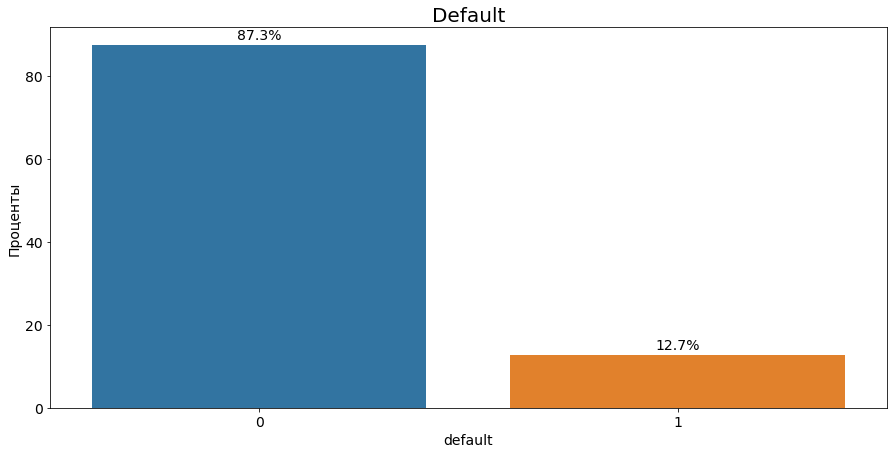

In [42]:
norm_target = (df
               .default
               .value_counts(normalize=True)
               .mul(100)
               .rename('percent')
               .reset_index())

plt.figure(figsize=(15, 7))
ax = sns.barplot(x='index', y='percent', data=norm_target)

for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage,  # текст
                (p.get_x() + p.get_width() / 2., p.get_height()),  # координата xy
                ha='center', # центрирование
                va='center',
                xytext=(0, 10),
                textcoords='offset points', # точка смещения относительно координаты
                fontsize=14)

plt.title('Default', fontsize=20)

plt.xlabel('default', fontsize=14)
plt.ylabel('Проценты', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);


Явный дисбаланс классов

# 1 Age

Text(1.7401822916666632, 0.5, 'Density')

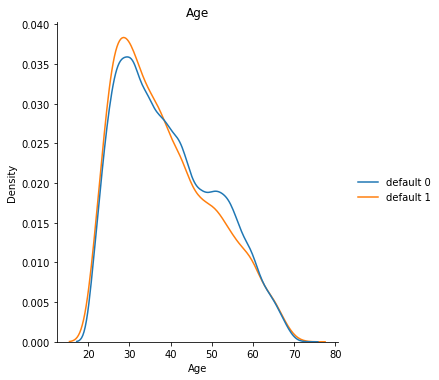

In [43]:
sns.displot({
    'default 0': df[df.default == 0].age,
    'default 1': df[df.default == 1].age
    },kind="kde", common_norm=False)
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Density')

In [44]:
df.groupby('default').agg({'age':'mean'}).reset_index().rename(columns={'age':'mean_age'})

,default,mean_age
0,0,39.390504
1,1,38.525395


In [45]:
df.groupby('default').agg({'age':'median'}).reset_index().rename(columns={'age':'median'})

,default,median
0,0,38.0
1,1,36.0


In [46]:
df.groupby('default')['age'].apply(lambda x: x.value_counts().index[0]).reset_index()

,default,age
0,0,31
1,1,26


 1 Гипотеза подтвердилась возраст 'хороших' заёмщиков выше 

# 2 Education

Text(6.010494791666666, 0.5, 'Density')

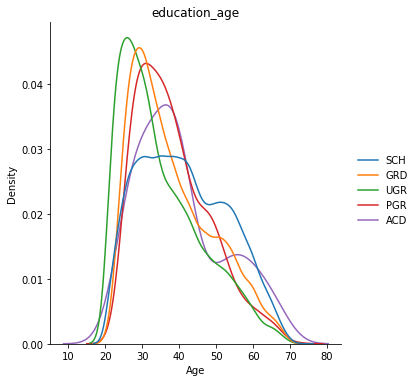

In [47]:
sns.displot({
    'SCH': df[df.education == 'SCH'].age,
    'GRD': df[df.education == 'GRD'].age,
    'UGR': df[df.education == 'UGR'].age,
    'PGR': df[df.education == 'PGR'].age,
    'ACD': df[df.education == 'ACD'].age
    },kind="kde", common_norm=False)

plt.title('education_age')
plt.xlabel('Age')
plt.ylabel('Density')

<AxesSubplot:xlabel='education', ylabel='age'>

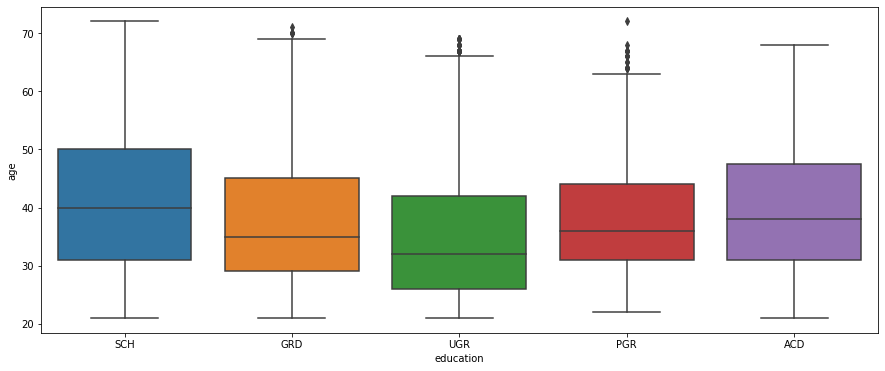

In [48]:
plt.figure(figsize=(15,6))
sns.boxplot(x = 'education', y = 'age',data = df)

<AxesSubplot:xlabel='education', ylabel='age'>

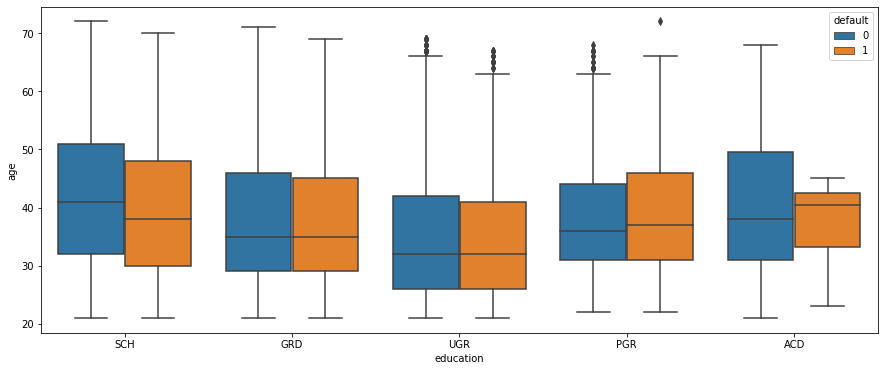

In [49]:
plt.figure(figsize=(15,6))

sns.boxplot(x = 'education', y = 'age',data = df, hue = 'default')

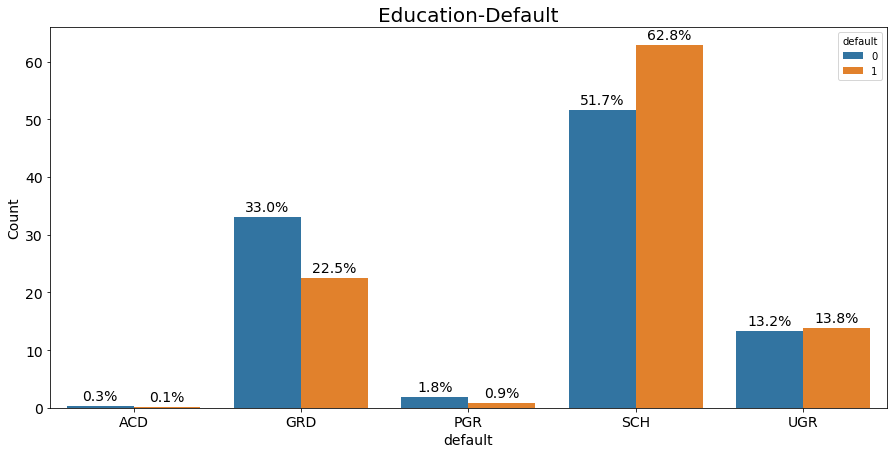

In [50]:
plt.figure(figsize=(15, 7))

educ_def = (df.groupby(['default'])['education']
            .value_counts(normalize=True)
            .rename('percentage')
            .mul(100)
            .reset_index()
            .sort_values('education'))

ax = sns.barplot(x="education", y="percentage", hue="default", data=educ_def)

for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage,  # текст
                (p.get_x() + p.get_width() / 2., p.get_height()),  # координата xy
                ha='center',  # центрирование
                va='center',
                xytext=(0, 10),
                textcoords='offset points',  # точка смещения относительно координаты
                fontsize=14)

plt.title('Education-Default', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('default', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

In [51]:
df.groupby('education').agg({'age':'mean'}).reset_index()

,education,age
0,ACD,40.149485
1,GRD,38.053970
2,PGR,38.252188
3,SCH,41.148492
4,UGR,34.862062


In [52]:
df.groupby(['default','education'])['age'].apply(lambda x: x.value_counts().index[0]).reset_index()

,default,education,age
0,0,ACD,36
1,0,GRD,28
2,0,PGR,31
3,0,SCH,42
4,0,UGR,23
5,1,ACD,40
6,1,GRD,30
7,1,PGR,32
8,1,SCH,30
9,1,UGR,26


Аналогично видим, что процент недобросовестных замщиков выше с уровнем образования SCH, для UGR разница не значительная. Скорее в данном случае влияет не как сам возраст, а уровень образования. Также можно отменить, что в какой то стемени GRD - более стабильны в плане выплат.

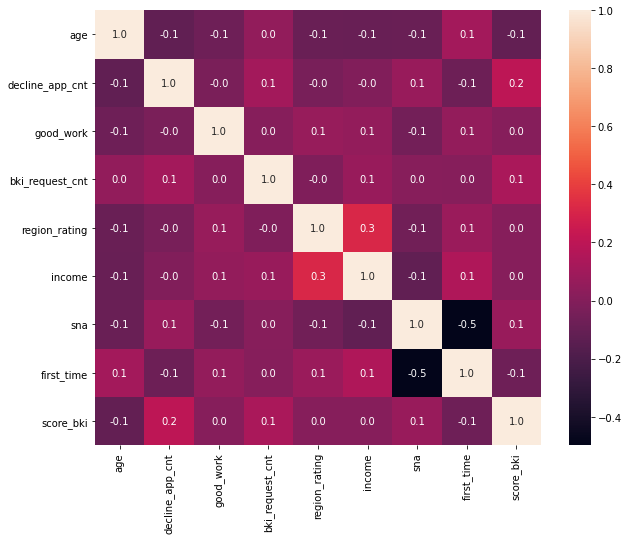

In [53]:
num_cols = ['age', 'decline_app_cnt', 'good_work', 'bki_request_cnt',
       'region_rating', 'income', 'sna', 'first_time', 'score_bki']

plt.figure(figsize=(10, 8))

sns.heatmap(df[num_cols].corr(method='spearman'), annot=True, fmt=".1f");

In [54]:
df.groupby('good_work')['default'].apply(lambda x: x.value_counts()[0])

good_work
0    53408
1    11019
Name: default, dtype: int64

Отсутствие хорошей работы увеличивает риск не возрата кредита

# INCOME

Text(14.240182291666663, 0.5, 'Density')

<Figure size 720x576 with 0 Axes>

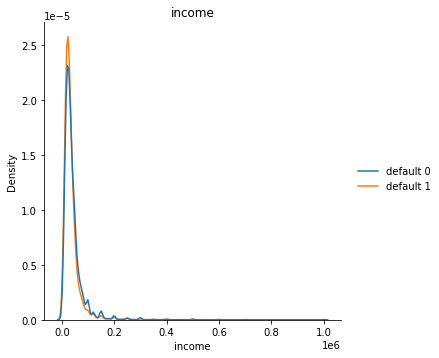

In [55]:
plt.figure(figsize=(10, 8))

sns.displot({
    'default 0': df[df.default == 0].income,
    'default 1': df[df.default == 1].income
    },kind="kde", common_norm=False)
plt.title('income')
plt.xlabel('income')
plt.ylabel('Density')

In [56]:
df.groupby('default').agg({'income':'median'}).rename(columns={'income':'income_median'}).reset_index()

,default,income_median
0,0,30000.0
1,1,28000.0


In [57]:
df.groupby('default')['income'].apply(lambda x: x.value_counts())

default        
0        30000     6135
         25000     5228
         20000     4663
         40000     4355
         50000     4037
                   ... 
1        124700       1
         9200         1
         35300        1
         38350        1
         5400         1
Name: income, Length: 1231, dtype: int64

In [58]:
df.groupby('default').agg({'income':'mean'}).rename(columns={'income':'income_mean'}).reset_index()

,default,income_mean
0,0,41799.713288
1,1,36288.113316


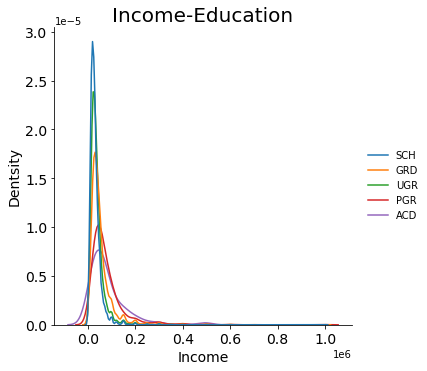

In [59]:
sns.displot({
    'SCH': df[df.education == 'SCH'].income,
    'GRD': df[df.education == 'GRD'].income,
    'UGR': df[df.education == 'UGR'].income,
    'PGR': df[df.education == 'PGR'].income,
    'ACD': df[df.education == 'ACD'].income
    },kind="kde", common_norm=False)


plt.title('Income-Education', fontsize=20)
plt.xlabel('Income', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

In [60]:
t1 = df.groupby('education').agg({'income':'mean'}).rename(columns={'income':'income_mean'}).reset_index()
t2 = df.groupby('education').agg({'income':'median'}).rename(columns={'income':'income_median'}).reset_index()


In [61]:
t = pd.merge(t1,t2,on='education')

In [62]:
t

,education,income_mean,income_median
0,ACD,82966.634021,60000.0
1,GRD,54663.948941,40000.0
2,PGR,77548.206046,60000.0
3,SCH,32059.020732,25000.0
4,UGR,39391.796251,30000.0


<AxesSubplot:xlabel='education', ylabel='income_mean'>

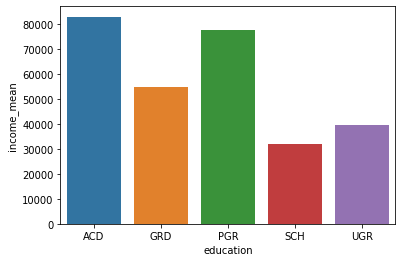

In [63]:
sns.barplot(data = t, x='education', y='income_mean')

Если человек имеет хорошее образование, то с большей вероятностью у него будет хороший доход

# SCORE_BKI

In [64]:
df.groupby('default').agg({'score_bki':'mean'})

,score_bki
default,
0,-1.938048
1,-1.675637


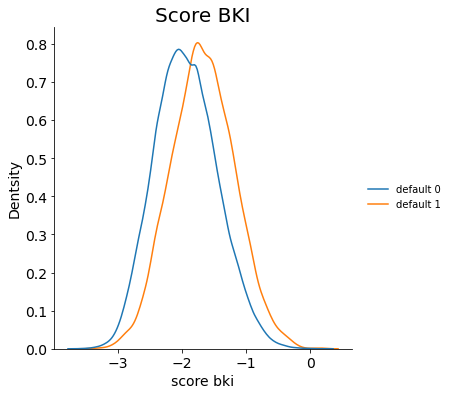

In [65]:
sns.displot({
    'default 0':df[df.default == 0].score_bki,
    'default 1':df[df.default == 1].score_bki
},kind ='kde',common_norm=False)

plt.title('Score BKI', fontsize=20)
plt.xlabel('score bki', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

In [66]:
df[df.default == 0].score_bki.max() - df[df.default == 0].score_bki.min()

3.82435917

In [67]:
df[df.default == 1].score_bki.max() - df[df.default == 1].score_bki.min()

3.65585917

Чем меньше BKI тем больше вероятность, что человек вернёт кредит

In [68]:
df[['score_bki','income']].corr(method='spearman')

,score_bki,income
score_bki,1.000000,0.007133
income,0.007133,1.000000


# foreign passport

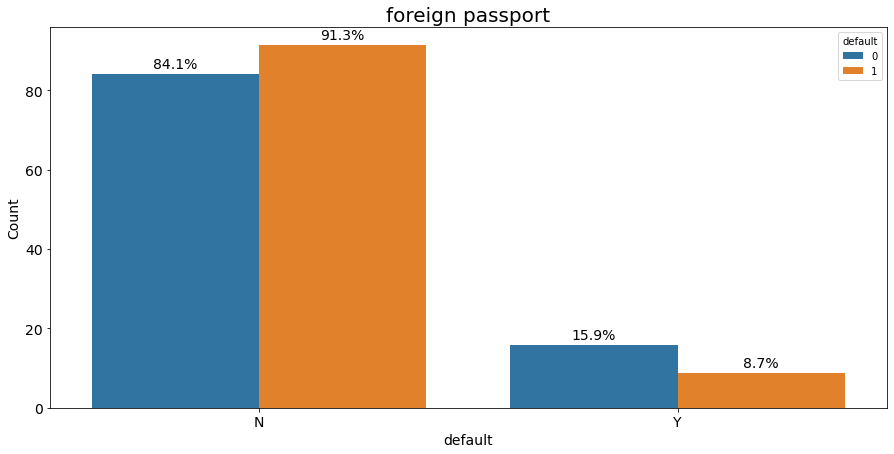

In [69]:
plt.figure(figsize=(15, 7))

educ_def = (df.groupby(['default'])['foreign_passport']
            .value_counts(normalize=True)
            .rename('percentage')
            .mul(100)
            .reset_index()
            .sort_values('foreign_passport'))

ax = sns.barplot(x="foreign_passport", y="percentage", hue="default", data=educ_def)

for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage,  # текст
                (p.get_x() + p.get_width() / 2., p.get_height()),  # координата xy
                ha='center',  # центрирование
                va='center',
                xytext=(0, 10),
                textcoords='offset points',  # точка смещения относительно координаты
                fontsize=14)

plt.title('foreign passport', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('default', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

Люди с загран паспортом более надежны

In [70]:
df.groupby(['foreign_passport','education']).agg({'client_id':'count'}).rename(columns={'client_id':'N'}).reset_index()

,foreign_passport,education,N
0,N,ACD,118
1,N,GRD,18010
2,N,PGR,854
3,N,SCH,35423
4,N,UGR,8328
5,Y,ACD,76
6,Y,GRD,5355
7,Y,PGR,403
8,Y,SCH,3744
9,Y,UGR,1488


----

# car type



In [71]:
df.groupby(['default','car']).agg({'client_id':'count'}).rename(columns={'client_id':'N'}).reset_index()

,default,car,N
0,0,N,43007
1,0,Y,21420
2,1,N,6825
3,1,Y,2547


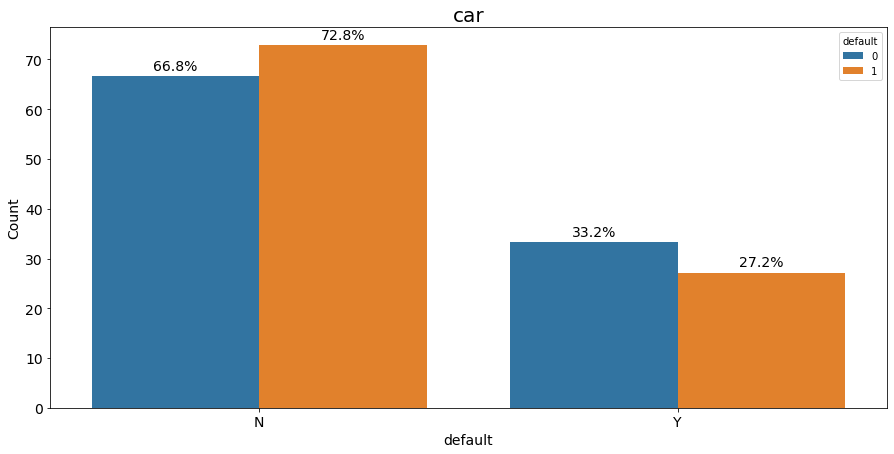

In [72]:
plt.figure(figsize=(15, 7))

educ_def = (df.groupby(['default'])['car']
            .value_counts(normalize=True)
            .rename('percentage')
            .mul(100)
            .reset_index()
            .sort_values('car'))

ax = sns.barplot(x="car", y="percentage", hue="default", data=educ_def)

for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage,  # текст
                (p.get_x() + p.get_width() / 2., p.get_height()),  # координата xy
                ha='center',  # центрирование
                va='center',
                xytext=(0, 10),
                textcoords='offset points',  # точка смещения относительно координаты
                fontsize=14)

plt.title('car', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('default', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

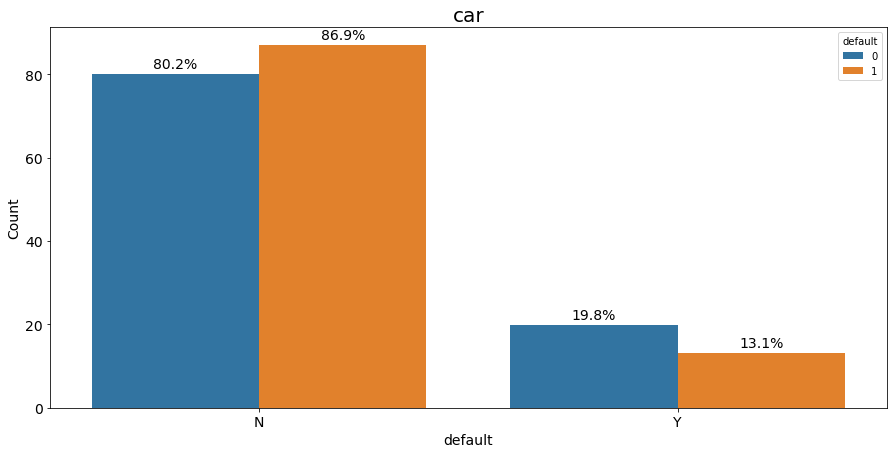

In [73]:
plt.figure(figsize=(15, 7))

educ_def = (df.groupby(['default'])['car_type']
            .value_counts(normalize=True)
            .rename('percentage')
            .mul(100)
            .reset_index()
            .sort_values('car_type'))

ax = sns.barplot(x="car_type", y="percentage", hue="default", data=educ_def)

for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage,  # текст
                (p.get_x() + p.get_width() / 2., p.get_height()),  # координата xy
                ha='center',  # центрирование
                va='center',
                xytext=(0, 10),
                textcoords='offset points',  # точка смещения относительно координаты
                fontsize=14)

plt.title('car', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('default', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

Если у человека есть машина то он с большей вероятностью сможет выполнять обязательства. Так же если это иномарка то его надежность растёт.

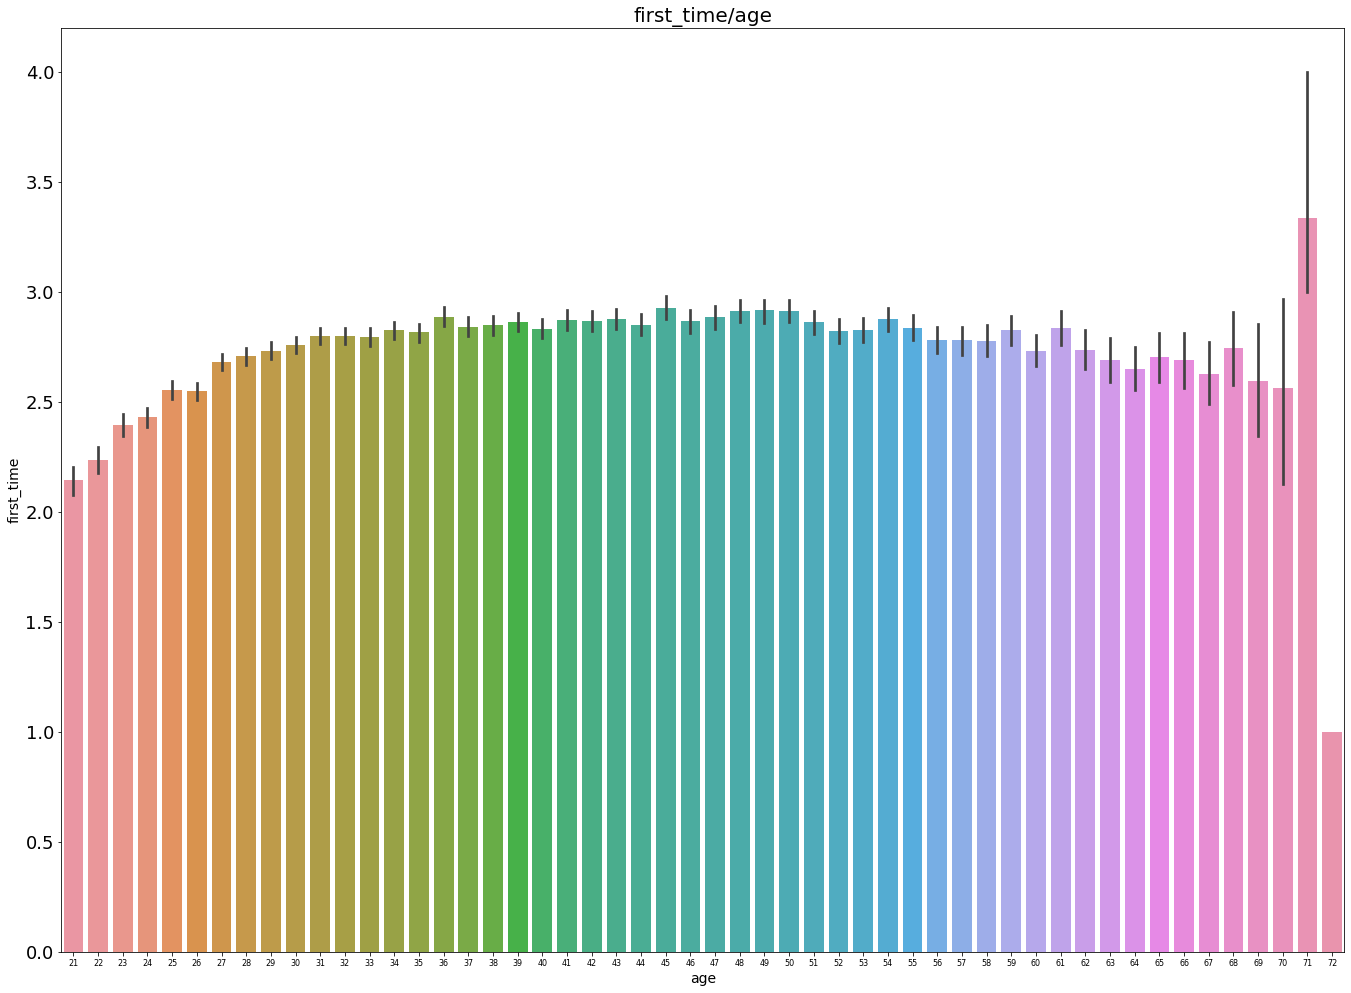

In [74]:
plt.figure(figsize=(23,17))
sns.barplot(data=df,x='age',y='first_time')
plt.title('first_time/age', fontsize=20)
plt.ylabel('first_time', fontsize=14)
plt.xlabel('age', fontsize=14)

plt.xticks(fontsize=8)
plt.yticks(fontsize=18);

Утверждать, что first_time и возраст связаны нельзя

Text(0.5, 6.79999999999999, 'sna')

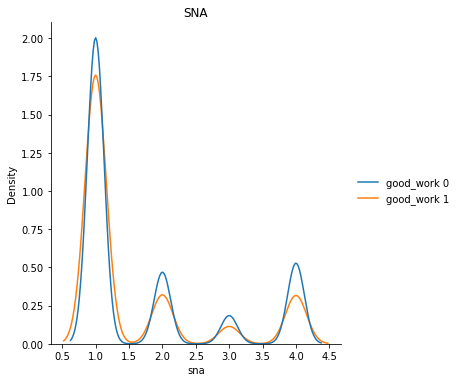

In [75]:
sns.displot({'good_work 0':df[df.good_work == 0].sna,
           'good_work 1':df[df.good_work == 1].sna},kind='kde',common_norm=False)
plt.title('SNA')
plt.xlabel('sna')

Люди с хорошей работай имеют более высокий sna

ФИЧИ

In [76]:


num_cols = ['age', 'decline_app_cnt', 'score_bki',
            'bki_request_cnt', 'income', 'first_time','region_rating']



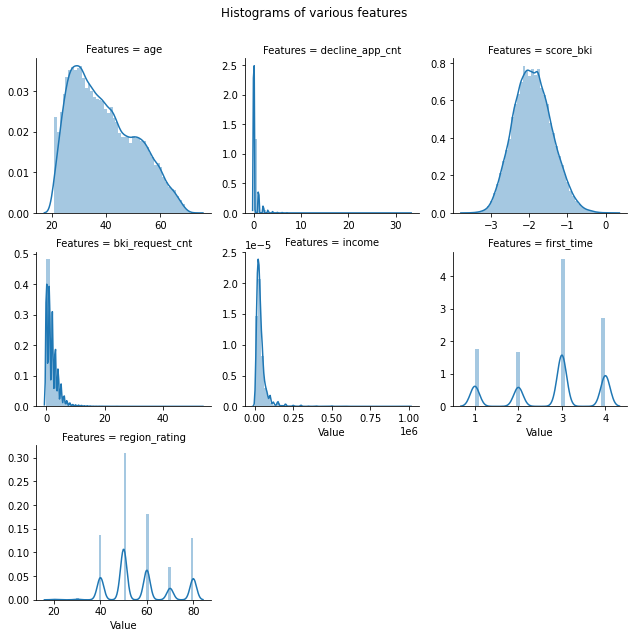

In [77]:


numeric_features = df[num_cols]

numeric_features = numeric_features.stack().reset_index().rename(
    columns={"level_1": "Features", 0: "Value"})

ax = sns.FacetGrid(data=numeric_features, col="Features",
                  col_wrap=3, sharex=False, sharey=False)
ax = ax.map(sns.distplot, "Value")

plt.subplots_adjust(top=0.9)
plt.suptitle("Histograms of various features");



In [78]:


for i in ['age', 'decline_app_cnt', 'bki_request_cnt', 'income']:
    df[i] = np.log(df[i]+1)



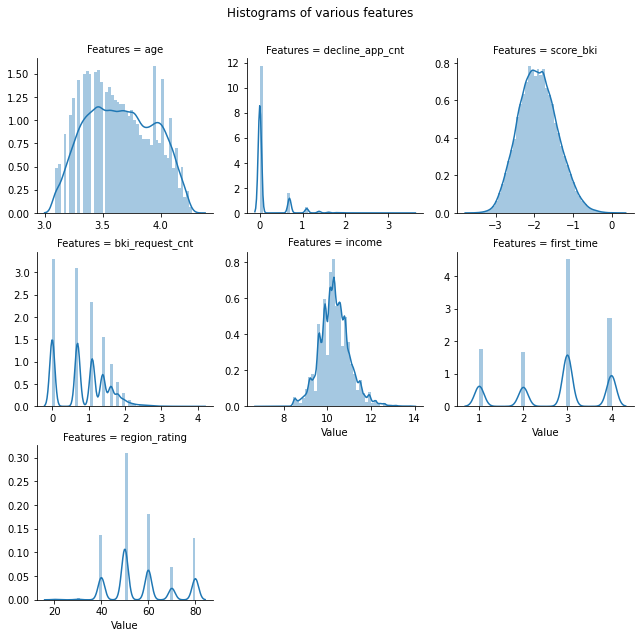

In [80]:
numeric_features = df[num_cols]

numeric_features = numeric_features.stack().reset_index().rename(
    columns={"level_1": "Features", 0: "Value"})

ax = sns.FacetGrid(data=numeric_features, col="Features",
                  col_wrap=3, sharex=False, sharey=False)
ax = ax.map(sns.distplot, "Value")

plt.subplots_adjust(top=0.9)
plt.suptitle("Histograms of various features");





In [81]:


# Новый признак - месяц
df['app_date'] = pd.to_datetime(df['app_date'], format='%d%b%Y')
df['month'] = df['app_date'].dt.month.astype(object)

df.drop(['app_date'],  axis=1, inplace=True)



In [82]:


# Средний доход с учетом рейтинга региона

mean_inc_reg = df.groupby('region_rating')['income'].median().to_dict()
df['mean_income_region'] = df['region_rating'].map(mean_inc_reg)



In [83]:


# Средний доход с учетом возраста

mean_inc_age = df.groupby('age')['income'].median().to_dict()
df['mean_income_age'] = df['age'].map(mean_inc_age)



In [84]:
# Средний score bki с учетом возраста

mean_bki_age = df.groupby('age')['score_bki'].median().to_dict()
df['mean_bki_age'] = df['age'].map(mean_bki_age)



In [85]:
df.head()

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,...,work_address,income,sna,first_time,foreign_passport,default,month,mean_income_region,mean_income_age,mean_bki_age
0,25905,SCH,M,4.143135,Y,Y,0.000000,0,-2.008753,0.693147,...,2,9.798183,4,1,N,0,2,10.126671,9.903538,-1.981476
1,63161,SCH,F,4.094345,N,N,0.000000,0,-1.532276,1.386294,...,3,9.852247,4,1,N,0,3,10.126671,9.998843,-1.994864
2,25887,SCH,M,3.258097,Y,N,1.098612,0,-1.408142,0.693147,...,2,10.308986,1,4,Y,0,2,10.757924,10.308986,-1.814637
3,16222,SCH,F,3.988984,N,N,0.000000,0,-2.057471,1.098612,...,3,9.210440,1,3,N,0,1,10.126671,10.212803,-1.993905
4,101655,GRD,M,3.891820,N,N,0.000000,1,-1.244723,0.693147,...,3,10.308986,1,4,Y,0,4,10.308986,10.308986,-1.988764


In [86]:
cat_cols = ['education', 'sex', 'car', 'car_type', 'good_work', 'home_address', 'work_address',
       'foreign_passport', 'sna', 'month']

In [87]:
num_cols = list(df.dtypes[df.dtypes == float].index) + list(df.dtypes[df.dtypes == int].index)[1:-1]
num_cols

['age',
 'decline_app_cnt',
 'score_bki',
 'bki_request_cnt',
 'income',
 'mean_income_region',
 'mean_income_age',
 'mean_bki_age']

model


In [88]:
df_label = pd.get_dummies(df, columns=cat_cols,
                          drop_first=True).drop('client_id', axis=1)

In [91]:
X = df_label.drop('default', axis=1)
y = df_label['default']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, shuffle=True, random_state=10)

In [92]:
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_score = lr.predict_proba(X_test)[:,1]

In [93]:
print('roc-auc:', roc_auc_score(y_test, y_score))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))
print('logloss:', log_loss(y_test, y_pred))

roc-auc: 0.7290790957537198
precision: 0.23098845057747114
recall: 0.6572769953051644
f1: 0.34184239733629296
logloss: 11.101303173866935


In [94]:
metrics = pd.DataFrame(
    index=['roc-auc', 'precision', 'recall', 'f1', 'logloss'])

metrics['Baseline_LR'] = [roc_auc_score(y_test, y_score),
                          precision_score(y_test, y_pred),
                          recall_score(y_test, y_pred),
                          f1_score(y_test, y_pred),
                          log_loss(y_test, y_pred)]

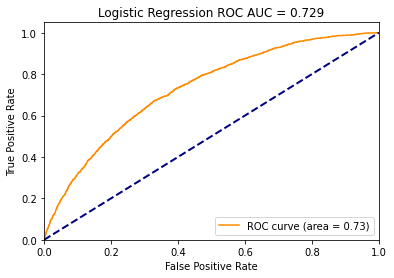

In [95]:
fpr, tpr, thresholds = roc_curve(y_test, y_score)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.legend(loc="lower right")
plt.show()


In [98]:
parameters_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': np.linspace(1, 1000, num=5),
    'solver': ['sag', 'saga', 'lbfgs'],
    'l1_ratio': [0.25, 0.5, 0.75],
    'max_iter': np.arange(100, 500, 100)
}

lr = LogisticRegression(class_weight='balanced')
cv = StratifiedKFold(n_splits=3, shuffle=True)
grid_cv = GridSearchCV(lr, parameters_grid,
                       scoring='roc_auc', cv=cv, verbose=2)

In [ ]:
grid_cv.fit(X_train, y_train)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l1, solver=saga; total time=   4.7s
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l1, solver=saga; total time=   5.1s
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l1, solver=saga; total time=   4.8s
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l2, solver=sag; total time=   4.1s
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, pe

In [ ]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

In [ ]:
best_params = {'C': 500.5, 
               'l1_ratio': 0.25,
               'max_iter': 400, 
               'penalty': 'l2', 
               'solver': 'lbfgs'}

In [ ]:
lr_gr = LogisticRegression(**best_params, class_weight='balanced')
lr_gr.fit(X_train, y_train)

y_pred_gr = lr_gr.predict(X_test)
y_score_gr = lr_gr.predict_proba(X_test)[:,1]

In [ ]:
print('roc-auc:', roc_auc_score(y_test, y_score_gr))
print('precision:', precision_score(y_test, y_pred_gr))
print('recall:', recall_score(y_test, y_pred_gr))
print('f1:', f1_score(y_test, y_pred_gr))
print('logloss:', log_loss(y_test, y_pred_gr)

In [ ]:
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, y_score_gr)

roc_auc_2 = auc(fpr_2, tpr_2)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot(fpr_2, tpr_2, color='green', label='ROC curve (area = %0.2f)' % roc_auc_2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.legend(loc="lower right")
plt.show()

In [ ]:
metrics['Grid_LR'] = [roc_auc_score(y_test, y_score_gr),
                      precision_score(y_test, y_pred_gr),
                      recall_score(y_test, y_pred_gr),
                      f1_score(y_test, y_pred_gr),
                      log_loss(y_test, y_pred_gr)]



In [ ]:
metrics[:-1].style.highlight_max(axis=1, color='lightblue')

In [4]:
n = int(input())
k = int(input())
a = [0]*n
for i in range(n):
    a[i] = float(input())

 5
 3
 0.668103249992
 0.525906286805
 0.0793836313371
 0.986652106472
 0.010960416731


In [12]:
m = 0
for i in range():
    for j in range()


[0.997612523203, 0.997612523203, 0.997612523203]

In [13]:
def task():
    
    def chk(arr):
        d={}
        for x in arr:
            while (x>0):
                p=x%10
                if d.get(p) is None:
                    d[p]=1
                x=x//10
        return len(d)==10
        
    n=int(input())
 
    for _ in range(n):
        res=[]
 
        l=int(input())
        inp=list(map(int,input().split()))
 
        f=False
        for i in range(l-3):
            for j in range(i+1,l-2):
                for k in range(j+1,l):
                    if chk([inp[i],inp[j],inp[k]]):
                        print(inp[i],inp[j],inp[k])
                        f=True
                        break
                if f:
                    break
            if f:
                break
 
task()

 10
 6
 1309 1584 1180 1762 1727 1152


1309 1584 1762


 4
 1928 1346 1980 1507


1928 1346 1507


KeyboardInterrupt: Interrupted by user

In [ ]:
def fun(nums, k):
    for i1 in range(k-2):
        
        for i2 in range(i1+1, k-1):
            s1 = set(nums[i1]) | set(nums[i2])
            if len(s1) < 6:
                continue
                
            for i3 in range(i2+1, k):
                if len(s1 | set(nums[i3])) == 10:
                    return (nums[i1], nums[i2], nums[i3])
n = int(input())
 
for i in range(n):
    m = int(input())
    lst = sorted(input().split(), key=lambda x: -len(set(x)))
            
    print(*fun(lst, m))

In [17]:
def soch(n, k):
    if 0 <= k <= n:
        nn = 1
        kk = 1
        for t in range(1, min(k, n - k) + 1):
            nn *= n
            kk *= t
            n -= 1
        return nn // kk
    else:
        return 0

NameError: name 'C' is not defined

In [ ]:
def soch(n, k):
    if 0 <= k <= n:
        nn = 1
        kk = 1
        for t in range(1, min(k, n - k) + 1):
            nn *= n
            kk *= t
            n -= 1
        return nn // kk
    else:
        return 0
    
t = int(input())
for _ in range(t):
    k,x,y,u,v,a,b = map(int,input().split())
    p_p  = (y-x+1)/37
    p_v  = (v-u+1)/37

    pd_p = 1 - p_p
    pd_v = 1 - p_v

    p_so = soch(k,a)
    v_so = soch(k,b)
    
    PP = p_so * (p_p**a) * (pd_p**(k-a))
    PV = v_so * (p_v**b) * (pd_v**(k-b))
    print(PP*PV)


In [ ]:
p_p  = (y-x+1)/37
p_v  = (u-v+1)/37

pd_p = 1 - p_p
pd_v = 1 - p_v


In [34]:
n = int(input())
k = int(input())
a = [0]*n
for i in range(n):
    a[i] = float(input())

 5
 3
   0.668103249992
   0.525906286805
   0.0793836313371
   0.986652106472
   0.010960416731


In [37]:

M=0
ans = a[0]
ans_l = 0
ans_r = 0
summ = 0
minus_pos = -1

for i in range(n):
    summ += a[i]
    if summ > ans:
        ans = summ
        ans_l = minus_pos+1
        ans_r = i
    if summ < 0:
        summ = 0
        minus_pos = r

for i in range(n):
    if i < ans_l or i > ans_r:
        M+=a[i]
print(ans_l,ans_r)
print(M)

0 2
0.997612523203


In [ ]:
 5
 3
 0.668103249992
 0.525906286805
 0.0793836313371
 0.986652106472
 0.010960416731

int ans = a[0],
	ans_l = 0,
	ans_r = 0,
	sum = 0,
	min_sum = 0,
	min_pos = -1;
for (int r=0; r<n; ++r) {
	sum += a[r];
 
	int cur = sum - min_sum;
	if (cur > ans) {
		ans = cur;
		ans_l = min_pos + 1;
		ans_r = r;
	}
 
	if (sum < min_sum) {
		min_sum = sum;
		min_pos = r;

In [31]:
n = int(input())
k = int(input())
l = 
a = [0]*n
b = [0]*n
c = [0]*n

for i in range(n):
    a[i] = float(input())
M=0

for i in range(n):
    if i % k:
        b[i] = max(a[i],b[i-1])
    else:
        b[i] = a[i]

for i in range(n-2,0,-1):
    if (i+1) % k:
        c[i] = max(a[i],c[i+1])
    else:
        c[i] = a[i]
print(max(c[l],c[l+k-1]))


 5
 3
  0.668103249992
  0.525906286805
  0.0793836313371
  0.986652106472
  0.010960416731


NameError: name 'l' is not defined

In [1]:
n = int(input())
k = int(input())
a = [float(input()) for i in range(n)]

 5
 3
 0.668103249992
 0.525906286805
 0.0793836313371
 0.986652106472
 0.010960416731


In [10]:
maxs = -1
x = 0
l=-1
r=-1
M=100
m=0
for i in range(k):
    print(1)
    for j in range(x,n-k+1):

        if sum(a[x:x+k]) >maxs:
            maxs = sum(a[x:x+k])
            for t in range(0,x):
                m +=a[t] 
            for t in range(x+k,n):
                m += a[t]
            if m < M:
                M = m
            m = 0
        x+=1
print(maxs)
print(M)

1
1
1
1.5919420246141
0.679063666723


In [8]:
 0.986652106472+ 0.525906286805+ 0.0793836313371
    

1.5919420246140998

In [28]:
f = open('untitled.txt')
a = []
for i in f.read().split():
    if i not in a:
        a.append(i)

print(len(a))

4
